In [1]:
#extracting lines for simplied verion
open('waddr.txt','w').writelines([ line for line in open("waddr-out.log") if "Enqueue" in line])
print ("done")

done


In [2]:
#extracting content from lines
csv_out = open('waddr_csv.txt','w')
with open ('waddr.txt', 'rt') as fft:
    csv_out.write("time,router,outport,inport,packet_address,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time\n")
    for line in fft:
        line_split = line.split()
        time = line_split[line_split.index("time:") + 1]
        router = line_split[line_split.index("SwitchAllocator") + 3]
        outport = line_split[line_split.index("outport") + 1]
        inport = line_split[line_split.index("inport") + 1]
        packet_address = line_split[line_split.index("addr") + 2][:-1]
        flit_id = line_split[line_split.index("[flit::") + 1][3:]
        flit_type = line_split[line_split.index("Id="+str(flit_id)) + 1][5:]
        vnet = line_split[line_split.index("Type="+str(type)) + 1][5:]
        vc = line_split[line_split.index("Vnet="+str(vnet)) + 1][3:]
        src_ni = line_split[line_split.index("VC="+str(vc)) + 2][3:]
        src_router = line_split[line_split.index("NI="+str(src_ni)) + 2][7:]
        dst_ni = line_split[line_split.index("Router="+str(src_router)) + 2][3:]
        dst_router = line_split[line_split.index("NI="+str(dst_ni)) + 2][7:]
        enq_time = str(line_split[line_split.index("Enqueue") + 1][5:])
        line_csv = time+","+router+","+outport+","+inport+","+packet_address+","+flit_id+","+flit_type+","+vnet+","+vc+","+src_ni+","+src_router+","+dst_ni+","+dst_router+","+enq_time+"\n"
        csv_out.write(line_csv)
print ("done")

done


In [5]:
#convert txt to csv
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("waddr_csv.txt",delimiter=',')
df.to_csv('waddr.csv',index=False)

In [4]:
#dataset
df = pd.read_csv('waddr.csv')

print(df.head())

   time  router outport inport packet  flit_id  type  vnet  vc  src_ni  \
0     7       0    East  Local   1dc0        0     3     2   8       0   
1    11       1    East   West   1dc0        0     3     2   8       0   
2    15       2    East   West   1dc0        0     3     2   8       0   
3    19       3   North   West   1dc0        0     3     2   8       0   
4    23       7   Local  South   1dc0        0     3     2   8       0   

   src_router  dst_ni  dst_router  enq_time  
0           0      23           7         3  
1           0      23           7         3  
2           0      23           7         3  
3           0      23           7         3  
4           0      23           7         3  


In [5]:
df.dtypes

time           int64
router         int64
outport       object
inport        object
packet        object
flit_id        int64
type           int64
vnet           int64
vc             int64
src_ni         int64
src_router     int64
dst_ni         int64
dst_router     int64
enq_time       int64
dtype: object

In [6]:
df.shape

(245551, 14)

In [7]:
df.describe()

,time,router,flit_id,type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time
count,2.455510e+05,245551.000000,245551.000000,245551.000000,245551.000000,245551.000000,245551.000000,245551.000000,245551.000000,245551.000000,2.455510e+05
mean,1.732599e+06,4.370021,1.666644,1.333332,2.935411,12.145505,12.564779,4.431495,12.147081,4.280365,1.732579e+06
std,1.059087e+06,4.384976,1.490712,0.942818,0.956338,3.887423,12.776027,5.433365,12.757902,5.399484,1.059086e+06
min,7.000000e+00,0.000000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,3.000000e+00
25%,7.219425e+05,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,7.219220e+05
50%,1.802783e+06,3.000000,1.000000,1.000000,3.000000,12.000000,17.000000,1.000000,0.000000,0.000000,1.802750e+06
75%,2.705146e+06,8.000000,3.000000,2.000000,4.000000,16.000000,26.000000,10.000000,25.000000,9.000000,2.705122e+06
max,3.152608e+06,15.000000,4.000000,3.000000,4.000000,19.000000,31.000000,15.000000,31.000000,15.000000,3.152596e+06


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

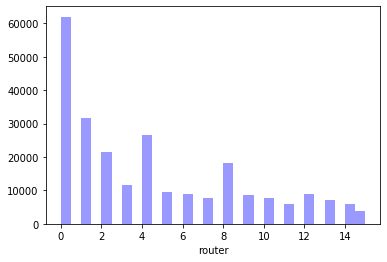

In [9]:
sns.distplot(df['router'], kde = False, bins=30, color='blue')

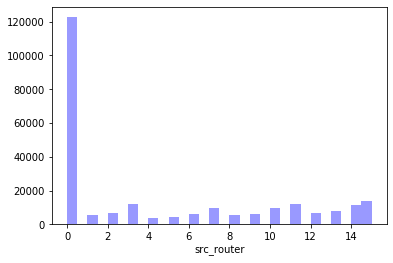

In [10]:
sns.distplot(df['src_router'], kde = False, bins=30, color='blue')

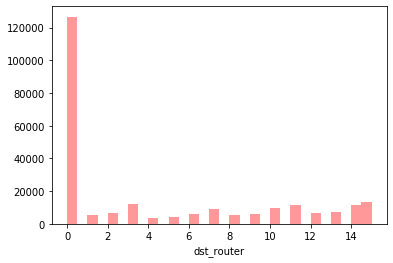

In [11]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

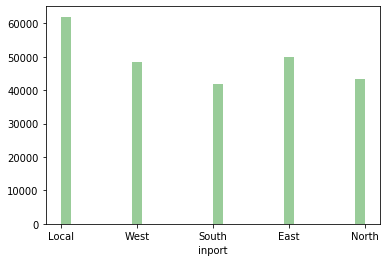

In [12]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')

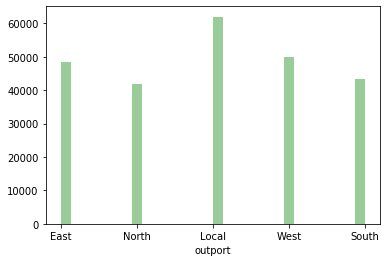

In [13]:
sns.distplot(df['outport'], kde = False, bins=30, color='green')

In [41]:
direction = {'Local': 0,'North': 1, 'East': 2, 'South':3,'West':4}
df = df.replace({'inport': direction, 'outport': direction})

In [42]:
df.dtypes

time           int64
router         int64
outport        int64
inport         int64
packet        object
flit_id        int64
type           int64
vnet           int64
vc             int64
src_ni         int64
src_router     int64
dst_ni         int64
dst_router     int64
enq_time       int64
packet_id      int32
dtype: object

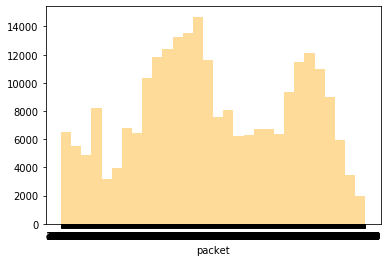

In [43]:
sns.distplot(df['packet'], kde = False, bins=30, color='orange')

In [44]:
from sklearn.preprocessing import LabelEncoder

In [30]:
dff = pd.DataFrame(df['packet'], columns=['packet'])

In [33]:
le = LabelEncoder()
encode = dff[dff.columns[:]].apply(le.fit_transform)

In [34]:
df['packet_id'] = encode

In [35]:
df.isnull().sum()

time          0
router        0
outport       0
inport        0
packet        0
flit_id       0
type          0
vnet          0
vc            0
src_ni        0
src_router    0
dst_ni        0
dst_router    0
enq_time      0
packet_id     0
dtype: int64

In [36]:
df.corr()

,time,router,flit_id,type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,packet_id
time,1.000000e+00,0.035270,-0.000015,-7.662813e-07,-0.031665,-0.034442,-0.012504,0.010225,0.040319,0.055390,1.000000,-2.649712e-01
router,3.526971e-02,1.000000,0.001808,-2.836210e-03,0.179307,0.169624,0.296786,0.423714,-0.111109,0.013340,0.035270,-4.297677e-02
flit_id,-1.520504e-05,0.001808,1.000000,7.905007e-02,0.104721,0.080540,0.009140,0.007784,-0.009145,-0.007813,-0.000019,-3.835767e-06
type,-7.662813e-07,-0.002836,0.079050,1.000000e+00,-0.165606,-0.127370,-0.014462,-0.012295,0.014483,0.012374,-0.000005,-3.567544e-07
vnet,-3.166479e-02,0.179307,0.104721,-1.656063e-01,1.000000,0.977442,0.930520,0.771852,-0.931291,-0.775392,-0.031659,1.612536e-02
vc,-3.444174e-02,0.169624,0.080540,-1.273700e-01,0.977442,1.000000,0.902745,0.739236,-0.914169,-0.767836,-0.034435,1.848603e-02
src_ni,-1.250373e-02,0.296786,0.009140,-1.446199e-02,0.930520,0.902745,1.000000,0.927483,-0.936383,-0.779631,-0.012498,-2.042474e-03
src_router,1.022479e-02,0.423714,0.007784,-1.229525e-02,0.771852,0.739236,0.927483,1.000000,-0.776561,-0.646564,0.010229,-2.498557e-02
dst_ni,4.031869e-02,-0.111109,-0.009145,1.448329e-02,-0.931291,-0.914169,-0.936383,-0.776561,1.000000,0.928605,0.040312,-2.944322e-02
dst_router,5.539027e-02,0.013340,-0.007813,1.237419e-02,-0.775392,-0.767836,-0.779631,-0.646564,0.928605,1.000000,0.055384,-4.925890e-02


In [45]:
df.dtypes

time           int64
router         int64
outport        int64
inport         int64
packet        object
flit_id        int64
type           int64
vnet           int64
vc             int64
src_ni         int64
src_router     int64
dst_ni         int64
dst_router     int64
enq_time       int64
packet_id      int32
dtype: object

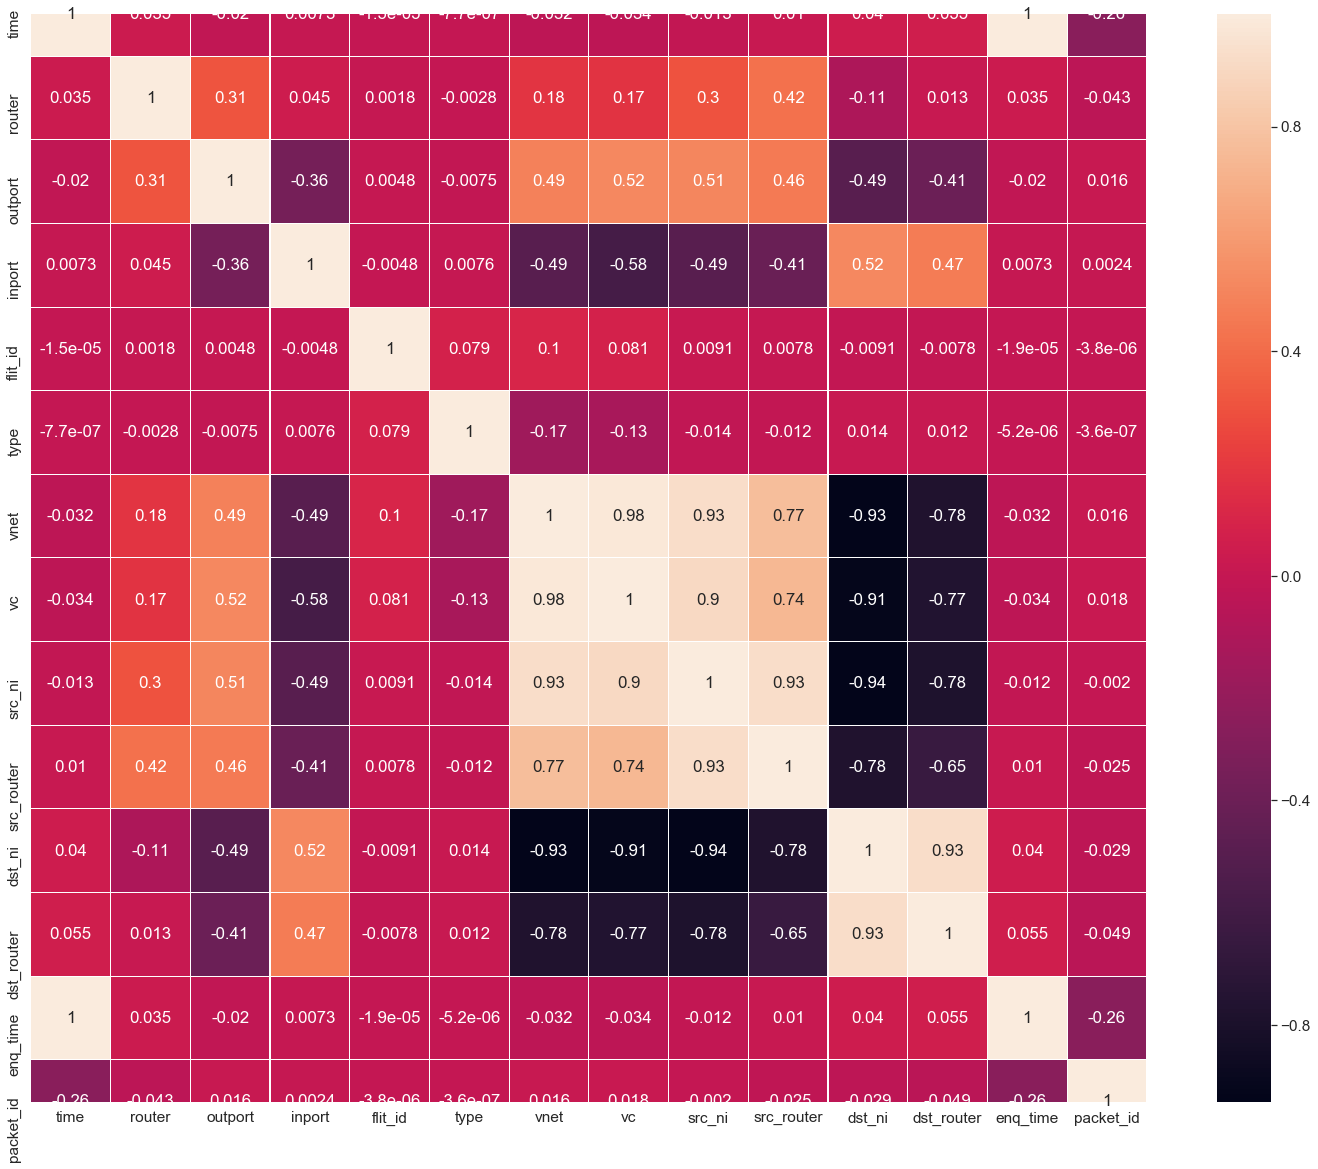

In [56]:
plt.figure(figsize=(25,20))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

In [62]:
df_v2 = df[:]

In [64]:
df_v2.to_csv('waddr_v2.csv',index=False)

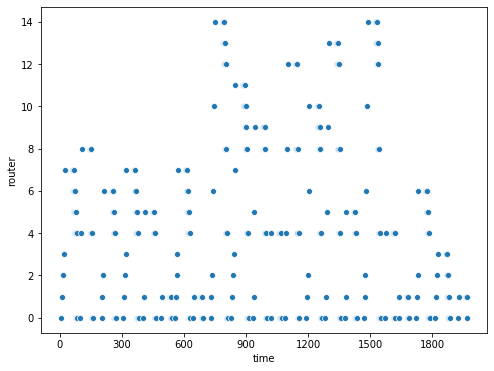

In [18]:
import numpy as np
dff_500 = pd.read_csv('waddr_v2.csv',nrows=500)
plt.figure(figsize=(8,6))
sns.scatterplot(x='time',y='router',data=dff_500)
plt.xticks(np.arange(0, 1970, 300))
plt.show()

In [20]:
dff_500['router'].value_counts()

0     129
4      89
8      42
1      42
5      39
6      30
12     21
7      19
9      17
13     16
2      15
10     13
14     12
3      10
11      6
Name: router, dtype: int64